# Stage 0: Verification (YOLOv11 - Skin vs Trash) 🛡️

This notebook tests the trained YOLOv11 classifier. 
**Goal:** Verify that the model accepts skin/wounds and REJECTS everything else (cars, nature, furniture, etc.).

In [4]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
import numpy as np
import glob

# Config
MODEL_PATH = "../models/stage0_yolo_v11/weights/best.pt"

def load_model():
    if not Path(MODEL_PATH).exists():
        print("❌ Model not found! Please run training notebook first.")
        return None
    print(f"Loading {MODEL_PATH}...")
    return YOLO(MODEL_PATH)

model = load_model()

Loading ../models/stage0_yolo_v11/weights/best.pt...


In [5]:
def predict_and_plot(image_path):
    if model is None: return
    
    # Inference
    results = model(image_path, verbose=False)
    result = results[0]
    
    # Get top class
    probs = result.probs
    top1_idx = probs.top1
    score = probs.top1conf.item()
    label_name = result.names[top1_idx]
    
    # Visualization
    img = Image.open(image_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    
    # Color logic: Green if correct filtering is expected
    display_text = f"{label_name.upper()}\n{score:.2%}"
    
    # If we classify as 'skin'/'wound' -> Green check
    # If we classify as 'background' -> Red alert (or Good Rejection)
    if label_name in ['wound', 'skin']:
        color = 'green'
        status = "✅ RELEVANT"
    else:
        color = 'red'
        status = "⛔ IRRELEVANT (REJECTED)"
        
    plt.title(f"{status}\n{display_text}", color=color, fontweight='bold')
    plt.show()
    return label_name, score

## 1. Test Key Examples

f:\Housepital-AI\Housepital-AI\venv_gpu\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


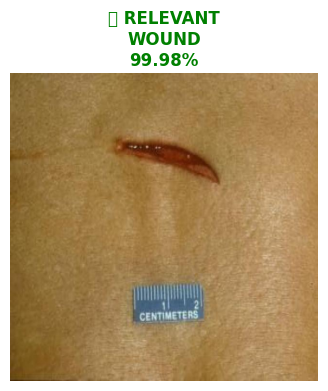

f:\Housepital-AI\Housepital-AI\venv_gpu\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9940 (\N{NO ENTRY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


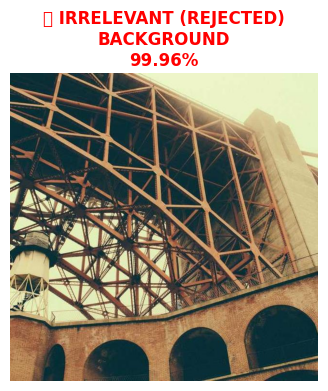

In [6]:
# Random Wound Image
wound_dir = Path("../data/raw/type_classification/cut")
if wound_dir.exists():
    w_files = list(wound_dir.glob("*.jpg"))
    if w_files: predict_and_plot(str(w_files[0]))
        
# Random High-Res Background Image
bg_dir = Path("../data/raw/background_class_highres")
if bg_dir.exists():
    b_files = list(bg_dir.glob("*.jpg"))
    if b_files: predict_and_plot(str(b_files[0]))

## 2. Test EXTERNAL Image (Your turn!)
Replace the path below with any image from your computer to test the "Real World" performance.

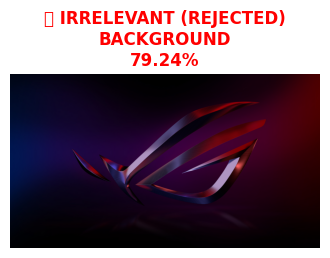

('background', 0.792434573173523)

In [ ]:
# Example:
# predict_and_plot("F:\\Housepital-AI\\Housepital-AI\\dfu_dataset\\Wound Multitask Data Set\\Fresh Images\\male (346).jpg")
# predict_and_plot("E:\\Genshin Impact\\Genshin Impact Screenshot 2023.12.15 - 13.43.06.17.png")
# predict_and_plot("E:\\AAST\\1.jpg")
# predict_and_plot("E:\\AAST\\Ezz.jpg")
# predict_and_plot("E:\\AAST\\IMG_2204.JPG")
# predict_and_plot("E:\\AAST\\pfp.jpg")
# predict_and_plot("E:\\AAST\\Plan-cover-page.jpg")
# predict_and_plot("E:\\AAST\\test.jpg")
# predict_and_plot("E:\\AAST\\WhatsApp Image 2025-10-13 at 00.07.57_e549e01c.jpg")
# predict_and_plot("E:\\AAST\\Landing Page.png")
# predict_and_plot("E:\\ALY\\Presented by.png")
# predict_and_plot("E:\\ALY\\WhatsApp Image 2025-11-18 at 07.31.15_86e87d41.jpg")
# predict_and_plot("E:\\ALY\\WhatsApp Image 2025-11-18 at 07.31.16_65bab787.jpg")
# predict_and_plot("E:\\download\\El Batal Study Mate Logos\\El Batal Study Mate Dark Mode.png")
# predict_and_plot("E:\\download\\FitNexus\\UI\\Login Page Dark.png")
# predict_and_plot("E:\\download\\FitNexus\\UI\\Register Succes Page.png")
# predict_and_plot("E:\\download\\handwritten_text_detection_and_recognition-master\\handwritten_text_detection_and_recognition-master\\data\\line\\0.png")
# predict_and_plot("E:\\download\\handwritten_text_detection_and_recognition-master\\handwritten_text_detection_and_recognition-master\\data\\page\\r06-137.png")
# predict_and_plot("E:\\download\\Telegram Desktop\\photo_2025-01-15_04-04-38.jpg")
# predict_and_plot("E:\\download\\1_friM3PPY86dZqAF9tnVzeQ.jpg")
# predict_and_plot("E:\\download\\3065_R0lVIEFOTiAzMjktMjg.jpg")
# predict_and_plot("E:\\download\\426355252_386989470684844_6434044836930637697_n.jpg")
# predict_and_plot("E:\\download\\A 3D character of a small boy with a friendly and supportive demeanor, similar to Samir the Study Buddy. The character should have short, tidy hair with a playful tuft, bright and expressive eyes, and casual clothing.png")
# predict_and_plot("E:\\download\\age-group.png")
# predict_and_plot("E:\\download\\anime-cat-gamer-wallpapers.jpg")
# predict_and_plot("E:\\download\\age-group.png")
# predict_and_plot("E:\\download\\Image.png")
# predict_and_plot("E:\\download\\logo.png")
# predict_and_plot("E:\\download\\Stealth_1920x1080.jpg")
